<a href="https://colab.research.google.com/github/leohgs/data_science_projects/blob/main/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução e objetivos do estudo

**WORLD HAPPINNESS REPORT: visão geral e enfoque no Brasil**

Dataset disponível em: https://www.kaggle.com/unsdsn/world-happiness

Uma pergunta constantemente levantamente é: o que influencia em nossa felicidade? Na tentativa de dar algumas respostas, desde 2012 o **World Happiness Report** tem sido realizado nos últimos anos com o inuito de classificar todos os países considerando um 'score felicidade', que se estratifica em alguns subcritérios.

***Objetivos da análise:***


*   Identificar dentre todos os países quais subcritérios possuem maior correlação com o score total de felicidade de um país no histórico de rankings entre 2015 e 2019;

*   Trazer informações específicas sobre o comportamento dos subcritérios brasileiros nesse contexto;

*   Realizar análise de evolução do Brasil nos subcritérios entre 2015 e 2019.










Antes de mais nada, é necessário importamros as bibliotecas necessárias para realização da análise:

# Importação de bibliotecas & Padronização/Unificação das bases de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Feito isso, realizamos uma importação por arquivo, por ano:

In [2]:
df15 = pd.read_csv('2015.csv')
df16 = pd.read_csv('2016.csv')
df17 = pd.read_csv('2017.csv')
df18 = pd.read_csv('2018.csv')
df19 = pd.read_csv('2019.csv')

df15['Ano'] = 2015
df16['Ano'] = 2016
df17['Ano'] = 2017
df18['Ano'] = 2018
df19['Ano'] = 2019

**Limpeza e padronização dos datasets:** como os datasets foram colhidos em datas diferentes, há diferença quanto às variáveis existentes e seus respectivos rótulos, o que nos leva a padronizá-las com identificadores únicos, além de descartar variáveis que não são úteis neste momento.


In [3]:
df15.drop(['Dystopia Residual', 'Standard Error', 'Region'], axis=1, inplace=True)
df16.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual', 'Region'], axis=1, inplace=True)

In [4]:
df17.drop(['Whisker.low', 'Whisker.high', 'Dystopia.Residual'], axis=1, inplace=True)

In [5]:
dfs = [df15, df16, df17, df18, df19]
for df in dfs:
  print(df.shape[1])

10
10
10
10
10


Todos os dataframes com o mesmo número de colunas! Estamos pronto para padronizar os rótulos de coluna e concatenar.

In [6]:
df15.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Ano'],
      dtype='object')

In [7]:
df16.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Ano'],
      dtype='object')

In [8]:
df17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Ano'],
      dtype='object')

In [9]:
df18.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ano'],
      dtype='object')

In [10]:
df19.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ano'],
      dtype='object')

In [11]:
df15 = df15.rename(columns={'Happiness Rank': 'Overall rank',
                     'Happiness Score': 'Score',
                     'Economy (GDP per Capita)': 'GDP per capita',
                     'Family': 'Social support',
                     'Health (Life Expectancy)': 'Healthy life expectancy',
                     'Freedom': 'Freedom to make life choices',
                     'Trust (Government Corruption)': 'Perceptions of Corruption',
                     'Country': 'Country or region'})

df16 = df16.rename(columns={'Happiness Rank': 'Overall rank',
                     'Happiness Score': 'Score',
                     'Economy (GDP per Capita)': 'GDP per capita',
                     'Family': 'Social support',
                     'Health (Life Expectancy)': 'Healthy life expectancy',
                     'Freedom': 'Freedom to make life choices',
                     'Trust (Government Corruption)': 'Perceptions of Corruption',
                     'Country': 'Country or region'})

df17 = df17.rename(columns={'Happiness.Rank': 'Overall rank',
                     'Happiness.Score': 'Score',
                     'Economy..GDP.per.Capita.': 'GDP per capita',
                     'Family': 'Social support',
                     'Health..Life.Expectancy.': 'Healthy life expectancy',
                     'Freedom': 'Freedom to make life choices',
                     'Trust..Government.Corruption.': 'Perceptions of Corruption',
                     'Country': 'Country or region'})

df18 = df18.rename(columns={'Perceptions of corruption': 'Perceptions of Corruption'})
df19 = df19.rename(columns={'Perceptions of corruption': 'Perceptions of Corruption'})

In [96]:
df_hist = pd.concat([df15, df16, df17, df18, df19])
df_hist.head().T

,0,1,2,3,4
Country or region,Switzerland,Iceland,Denmark,Norway,Canada
Overall rank,1,2,3,4,5
Score,7.587,7.561,7.527,7.522,7.427
GDP per capita,1.39651,1.30232,1.32548,1.459,1.32629
Social support,1.34951,1.40223,1.36058,1.33095,1.32261
Healthy life expectancy,0.94143,0.94784,0.87464,0.88521,0.90563
Freedom to make life choices,0.66557,0.62877,0.64938,0.66973,0.63297
Perceptions of Corruption,0.41978,0.14145,0.48357,0.36503,0.32957
Generosity,0.29678,0.4363,0.34139,0.34699,0.45811
Ano,2015,2015,2015,2015,2015


Temos ao todo 6 subcritérios: 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'.

O resumo do dataframe hospedado no Kaggle nos traz a seguinte definição a respeito da variável 'Score' do dataset:

*   Score: uma medida mensurada através da simples resposta à pergunta: "De 0 a 10, de quanto a seria a sua avaliação a respeito da sua felicidade?"
*   Em complemento, as demais variáveis (que chamamos de subcritérios) representam a contribuição de cada um dos fatores para a avaliação geral do score de felicidade.



In [13]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             782 non-null    object 
 1   Overall rank                  782 non-null    int64  
 2   Score                         782 non-null    float64
 3   GDP per capita                782 non-null    float64
 4   Social support                782 non-null    float64
 5   Healthy life expectancy       782 non-null    float64
 6   Freedom to make life choices  782 non-null    float64
 7   Perceptions of Corruption     781 non-null    float64
 8   Generosity                    782 non-null    float64
 9   Ano                           782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


# Estudos estatísticos da base de dados

**Análise de correlação dos subcritérios de Happiness**

In [14]:
df_hist.head(16).T # Brasil é o 15° no ranking médio dos últimos 4 anos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Country or region,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,Israel,Costa Rica,Austria,Mexico,United States,Brazil
Overall rank,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Score,7.587,7.561,7.527,7.522,7.427,7.406,7.378,7.364,7.286,7.284,7.278,7.226,7.2,7.187,7.119,6.983
GDP per capita,1.39651,1.30232,1.32548,1.459,1.32629,1.29025,1.32944,1.33171,1.25018,1.33358,1.22857,0.95578,1.33723,1.02054,1.39451,0.98124
Social support,1.34951,1.40223,1.36058,1.33095,1.32261,1.31826,1.28017,1.28907,1.31967,1.30923,1.22393,1.23788,1.29704,0.91451,1.24711,1.23287
Healthy life expectancy,0.94143,0.94784,0.87464,0.88521,0.90563,0.88911,0.89284,0.91087,0.90837,0.93156,0.91387,0.86027,0.89042,0.81444,0.86179,0.69702
Freedom to make life choices,0.66557,0.62877,0.64938,0.66973,0.63297,0.64169,0.61576,0.6598,0.63938,0.65124,0.41319,0.63376,0.62433,0.48181,0.54604,0.49049
Perceptions of Corruption,0.41978,0.14145,0.48357,0.36503,0.32957,0.41372,0.31814,0.43844,0.42922,0.35637,0.07785,0.10583,0.18676,0.21312,0.1589,0.17521
Generosity,0.29678,0.4363,0.34139,0.34699,0.45811,0.23351,0.4761,0.36262,0.47501,0.43562,0.33172,0.25497,0.33088,0.14074,0.40105,0.14574
Ano,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015


O heatmap abaixo busca traçar correlações entre todas as variáveis do dataset.

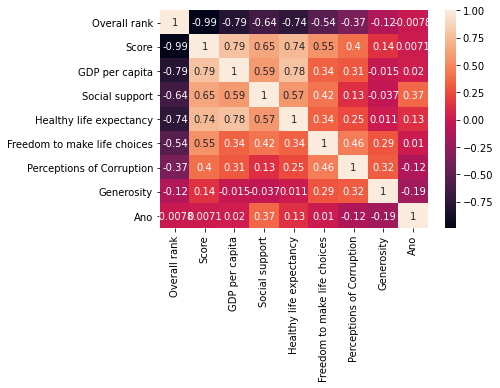

In [15]:
sns.heatmap(df_hist.corr(), annot=True)

O heatmap traz uma informação importante: há forte correlação entre o score total de felicidade e o GDP, Social Support e Healthy Life Expectanty indexes. Além disso, esses três subcritérios parecem estar fortemente ligados entre si.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


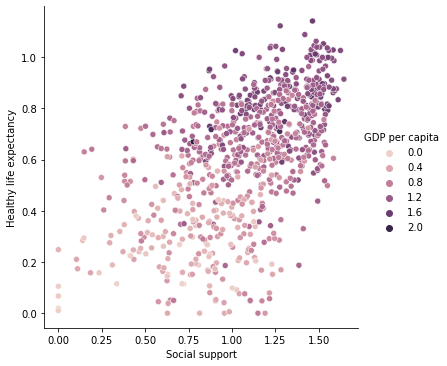

In [17]:
sns.relplot(df_hist['Social support'], df_hist['Healthy life expectancy'], hue=df_hist['GDP per capita'])

Essa aparente relação entre as 3 variáveis é evidenciada acima: quanto maior o GDP, maior tende a ser a expectativa de vida e maior é o suporte social nos países.

Buscamos aqui traçar subplots para observar as distribuições de frequência de todos os subcritérios e suas respectivas correlações com o Score de Felicidade:

Text(0, 0.5, 'Score de Perceptions of Corruption')

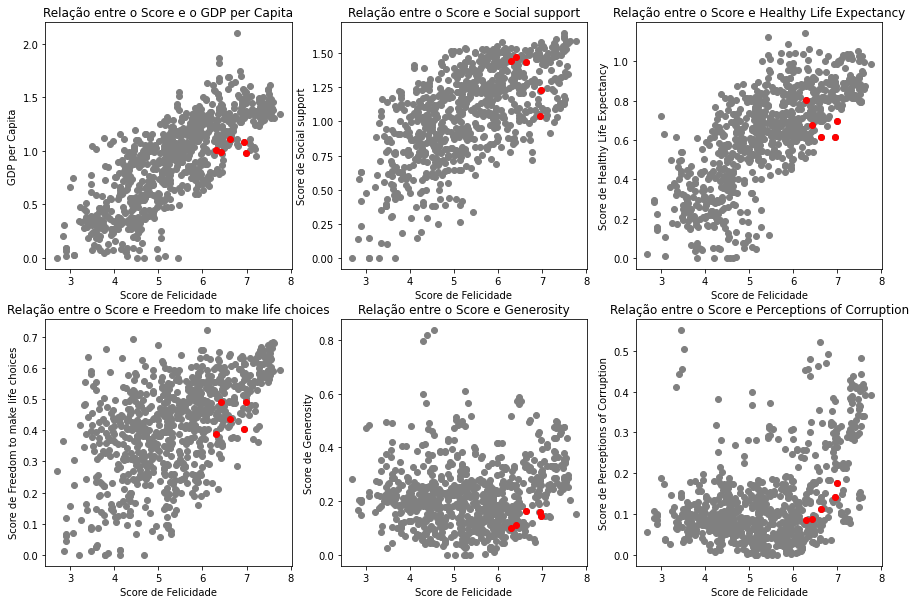

In [90]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0,0].scatter(df_hist['Score'], df_hist['GDP per capita'], c='grey')
axs[0,1].scatter(df_hist['Score'], df_hist['Social support'], c='grey')
axs[0,2].scatter(df_hist['Score'], df_hist['Healthy life expectancy'], c='grey')
axs[1,0].scatter(df_hist['Score'], df_hist['Freedom to make life choices'], c='grey')
axs[1,1].scatter(df_hist['Score'], df_hist['Generosity'], c='grey')
axs[1,2].scatter(df_hist['Score'], df_hist['Perceptions of Corruption'], c='grey')

# Guardando a seleção do Brazil em variável para reutilização:
brazil = df_hist['Country or region'] == 'Brazil'

axs[0,0].scatter(df_hist[brazil]['Score'], df_hist[brazil]['GDP per capita'], c='red')
axs[0,1].scatter(df_hist[brazil]['Score'], df_hist[brazil]['Social support'], c='red')
axs[0,2].scatter(df_hist[brazil]['Score'], df_hist[brazil]['Healthy life expectancy'], c='red')
axs[1,0].scatter(df_hist[brazil]['Score'], df_hist[brazil]['Freedom to make life choices'], c='red')
axs[1,1].scatter(df_hist[brazil]['Score'], df_hist[brazil]['Generosity'], c='red')
axs[1,2].scatter(df_hist[brazil]['Score'], df_hist[brazil]['Perceptions of Corruption'], c='red')

axs[0,0].set_title('Relação entre o Score e o GDP per Capita')
axs[0,1].set_title('Relação entre o Score e Social support')
axs[0,2].set_title('Relação entre o Score e Healthy Life Expectancy')
axs[1,0].set_title('Relação entre o Score e Freedom to make life choices')
axs[1,1].set_title('Relação entre o Score e Generosity')
axs[1,2].set_title('Relação entre o Score e Perceptions of Corruption')

axs[0,0].set_xlabel('Score de Felicidade')
axs[0,1].set_xlabel('Score de Felicidade')
axs[0,2].set_xlabel('Score de Felicidade')
axs[1,0].set_xlabel('Score de Felicidade')
axs[1,1].set_xlabel('Score de Felicidade')
axs[1,2].set_xlabel('Score de Felicidade')

axs[0,0].set_ylabel('GDP per Capita')
axs[0,1].set_ylabel('Score de Social support')
axs[0,2].set_ylabel('Score de Healthy Life Expectancy')
axs[1,0].set_ylabel('Score de Freedom to make life choices')
axs[1,1].set_ylabel('Score de Generosity')
axs[1,2].set_ylabel('Score de Perceptions of Corruption')

Acima estão destacados os gráficos de dispersão de cada um dos subcritérios e o ponto referente ao Brasil destacado em vermelho. Percebe-se alta correlação entre o fator 'GDP per Capita' e o score total de Happiness. O subcritério 'Healthy Life Expectancy' também mostra razoável correlação.

Para isso, criamos uma nova variável ('Country grouping') no conjunto de dados separando cada país do Brasil:

***BRASIL: ANÁLISE COMPARATIVAS DA DISTRIBUIÇÃO DOS SUBCRITÉRIOS***

Para estabelecer uma análise comparativa entre o Brasil e os demais países, cria-se uma nova variável estabelecendo essa separação

In [18]:
f = lambda x: 'Brazil' if x == 'Brazil' else 'Rest of the world'

In [19]:
df_hist['Country grouping'] = df_hist['Country or region'].map(f)
brazil_df_hist = df_hist['Country grouping'] == 'Brazil'
rest_df_hist = df_hist['Country grouping'] != 'Brazil'

Vamos visualizar a distribuição de frequência dos subcritérios entre os países do resto do mundo:




(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

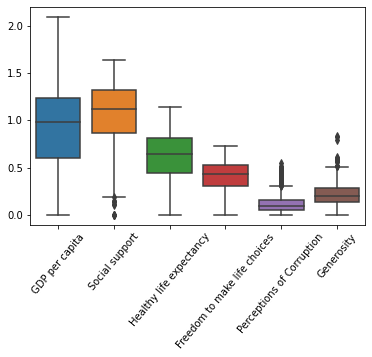

In [20]:
sns.boxplot(data=df_hist[rest_df_hist].iloc[:, 3:9])
plt.xticks(rotation=50)

*Observa-se grande heterogeneidade entre os índices de Generosidade e Percepção de Corrupção entre os países. Uma hipótese (a ser avaliada por estudos mais profundos) é de de que se tratam de critérios mais subjetivos e, portanto, mais abertos a diferentes interpretações.*

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

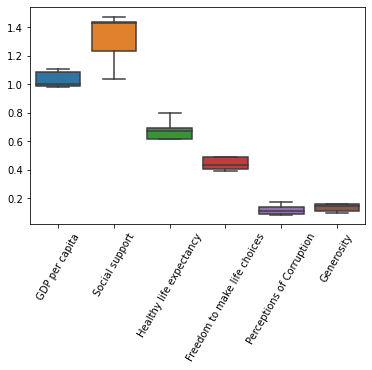

In [21]:
sns.boxplot(data=df_hist[brazil_df_hist].iloc[:, 3:9])
plt.xticks(rotation=60)

Já o boxplot acima nos mostra as distribuições de frequência especificamente para o Brasil.

***BRASIL: ANÁLISE HISTÓRICA DA EVOLUÇÃO DOS SUBCRITÉRIOS***

In [30]:
brazil_selection = df_hist[brazil_df_hist]
brazil_selection

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of Corruption,Generosity,Ano,Country grouping
15,Brazil,16,6.983,0.981240,1.232870,0.697020,0.490490,0.175210,0.14574,2015,Brazil
16,Brazil,17,6.952,1.087540,1.039380,0.614150,0.404250,0.141660,0.15776,2016,Brazil
21,Brazil,22,6.635,1.107353,1.431306,0.616552,0.437454,0.111093,0.16235,2017,Brazil
27,Brazil,28,6.419,0.986000,1.474000,0.675000,0.493000,0.088000,0.11000,2018,Brazil
31,Brazil,32,6.300,1.004000,1.439000,0.802000,0.390000,0.086000,0.09900,2019,Brazil


Ao visualizarmos o dataframe específico sobre a evolução do Brasil, percebe-se de imediato que houve declínio contínuo de posições e índices de felicidade desde 2015 até 2019. O Brasil estava em 16, e perdeu 16 posições, estando 32° no ranking mundial em 2019. Seu score geral também declinou, de 6,983 para 6,30. Vamos entender a quais subcritérios se deve tal declínio?

In [82]:
brazil_selection_melted = brazil_selection.iloc[:, 3:10].melt(id_vars=['Ano'])
brazil_variables_selection_melted

,Ano,variable,value
0,2015,GDP per capita,0.981240
1,2016,GDP per capita,1.087540
2,2017,GDP per capita,1.107353
3,2018,GDP per capita,0.986000
4,2019,GDP per capita,1.004000
5,2015,Social support,1.232870
6,2016,Social support,1.039380
7,2017,Social support,1.431306
8,2018,Social support,1.474000
9,2019,Social support,1.439000


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

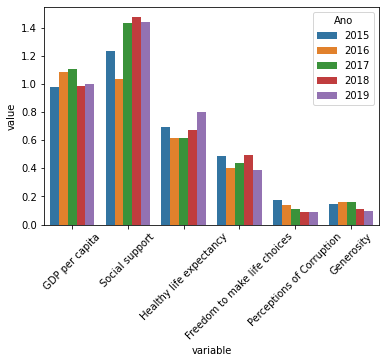

In [85]:
sns.barplot(data=brazil_selection_melted, x='variable', y='value', hue='Ano')
plt.xticks(rotation=45)

Percebe-se claramente um comportamento padrão de declínio ou estabilidade na maioria dos fatores entre 2015 e 2019.

Em resumo, percebeu-se declínio no score total de felicidade percebida pelos brasileiros. A nível do resto do mundo, quando olhamos os números médios conforme abaixo:

In [94]:
df_hist[rest_df_hist].groupby('Ano')['Score'].mean()

Ano
2015    5.365497
2016    5.372122
2017    5.345701
2018    5.369187
2019    5.401335
Name: Score, dtype: float64

Percebe-se que o comportamento foi inverso, considerando que, ainda que sutil, houve evolução no índice médio de felicidade. Isso explica a perda de 16 posições no ranking durante os 5 anos de análise. Ainda assim, o Brasil mantém score de 6,30 em 2019, que ainda está acima da média global atual de 2019 (5,40).